# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-1316 Introduction to *Urban* Data Science 


## Lab 1 - part 3: Web Scraping

**TU Delft**<br>
**Q1 2022**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Auriane Técourt, Dorukhan Yeşilli, Ludovica Bindi, Nicolò Canal, Ruth Nelson, Vaibhavi Srivastava <br>
**[Centre for Urban Science & Policy]( https://cusp.tbm.tudelft.nl/)** <br>


---


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import os
from IPython.display import Image

# **NOTE:** The contents of this notebook are advanced in nature and only optional to look at.

## Table of Contents

* [Learning Goals](#section0)
* [Introduction to Web Servers and HTTP](#section1)
* [Download webpages and get basic properties](#section2)
* [Beautiful Soup](#section3)
    * [Parse the page with Beautiful Soup](#section3_1)
    * [Takeaway lesson](#section3_2)
* [String formatting](#section4)
* [Walkthrough Example of web scraping](#section5)
* [How To Utilize APIs](#section6)
    * [What is an API?](#section6_1)
    * [Making API Requests in Python](#section6_2)
    * [First API Request](#section6_3)

## Learning Goals <a class="anchor" id="section0"></a>

- Understand the structure of a web page
- Understand how to use Beautiful soup to scrape content from web pages.
- Feel comfortable storing and manipulating the content in various formats.
- Understand how to convert structured format into a Pandas DataFrame

In this lab, we'll scrape Goodread's Best Books list:

https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1 .

We'll walk through scraping the list pages for the book names/urls. First, we start with an even simpler example.

## Introduction to Web Servers and HTTP <a class="anchor" id="section1"></a>

A web server is just a computer -- usually a powerful one, but ultimately it's just another computer -- that runs a long/continuous process that listens for requests on a pre-specified (Internet) _port_ on your computer. It responds to those requests via a protocol called HTTP (HyperText Transfer Protocol). HTTPS is the secure version. When we use a web browser and navigate to a web page, our browser is actually sending a request on our behalf to a specific web server. The browser request is essentially saying "hey, please give me the web page contents", and it's up to the browser to correctly render that raw content into a coherent manner, dependent on the format of the file. For example, HTML is one format, XML is another format, and so on.

Ideally (and usually), the web server complies with the request and all is fine. As part of this communication exchange with web servers, the server also sends a status code.
- If the code starts with a **2**, it means the request was successful.
- If the code starts with a **4**, it means there was a client error (you, as the user, are the client). For example, ever receive a 404 File Not Found error because a web page doesn't exist? This is an example of a client error, because you are requesting a bogus item.
- If the code starts with a **5**, it means there was a server error (often that your request was incorrectly formed).

[Click here](https://www.restapitutorial.com/httpstatuscodes.html) for a full list of status codes.

As an analogy, you can think of a web server as being like a server at a restaurant; its goal is _serve_ you your requests. When you try to order something not on the menu (i.e., ask for a web page at a wrong location), the server says 'sorry, we don't have that' (i.e., 404, client error; your mistake).

**IMPORTANT:**
As humans, we visit pages in a sane, reasonable rate. However, as we start to scrape web pages with our computers, we will be sending requests with our code, and thus, we can make requests at an incredible rate. This is potentially dangerous because it's akin to going to a restaurant and bombarding the server(s) with thousands of food orders. Very often, the restaurant will ban you (i.e., Harvard's network gets banned from the website, and you are potentially held responsible in some capacity?). It is imperative to be responsible and careful. In fact, this act of flooding web pages with requests is the single-most popular, yet archiac, method for maliciously attacking websites / computers with Internet connections. In short, be respectful and careful with your decisions and code. It is better to err on the side of caution, which includes using the **``time.sleep()`` function** to pause your code's execution between subsequent requests. ``time.sleep(2)`` should be fine when making just a few dozen requests. Each site has its own rules, which are often visible via their site's ``robots.txt`` file.

### Additional Resources

**HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet.

**Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp.

## Download webpages and get basic properties <a class="anchor" id="section2"></a>

``Requests`` is a highly useful Python library that allows us to fetch web pages.
``BeautifulSoup`` is a phenomenal Python library that allows us to easily parse web content and perform basic extraction.

If one wishes to scrape webpages, one usually uses ``requests`` to fetch the page and ``BeautifulSoup`` to parse the page's meaningful components. Webpages can be messy, despite having a structured format, which is why BeautifulSoup is so handy.

Let's get started:

In [2]:
from bs4 import BeautifulSoup
import requests

To fetch a webpage's content, we can simply use the ``get()`` function within the requests library:

In [3]:
url = "https://www.npr.org/2018/11/05/664395755/what-if-the-polls-are-wrong-again-4-scenarios-for-what-might-happen-in-the-elect"
response = requests.get(url) # you can use any URL that you wish

The response variable has many highly useful attributes, such as:
- status_code
- text
- content

Let's try each of them!

### response.status_code

In [4]:
response.status_code

200

You should have received a status code of 200, which means the page was successfully found on the server and sent to receiver (aka client/user/you). [Again, you can click here](https://www.restapitutorial.com/httpstatuscodes.html) for a full list of status codes.

### response.text


In [5]:
response.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta name="robots" content="noindex, nofollow">\n    <meta content="text/html;charset=utf-8" http-equiv="Content-Type">\n    <meta content="utf-8" http-equiv="encoding">\n    <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, shrink-to-fit=no" />\n\n    <title>NPR Cookie Consent and Choices</title>\n\n    <link rel="stylesheet" media="screen, print" href="https://s.npr.org/templates/css/fonts/Knockout.css"/>\n    <link rel="stylesheet" media="screen, print" href="https://s.npr.org/templates/css/fonts/GothamSSm.css"/>\n    <link rel="stylesheet" media="screen, print" href="css/choice-stylesheet.css"/>\n    <script type="text/javascript" src="./js/redirects.js"></script>\n    <script type="text/javascript" src="./js/domains.js"></script>\n</head>\n<body>\n<main class="content" id="content">\n    <header role="banner">\n        <img src="https://media.npr.org/chrome_svg/npr-logo.svg" alt="N

Holy moly! That looks awful. If we use our browser to visit the URL, then right-click the page and click 'View Page Source', we see that it is identical to this chunk of glorious text.

### response.content

In [6]:
response.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta name="robots" content="noindex, nofollow">\n    <meta content="text/html;charset=utf-8" http-equiv="Content-Type">\n    <meta content="utf-8" http-equiv="encoding">\n    <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, shrink-to-fit=no" />\n\n    <title>NPR Cookie Consent and Choices</title>\n\n    <link rel="stylesheet" media="screen, print" href="https://s.npr.org/templates/css/fonts/Knockout.css"/>\n    <link rel="stylesheet" media="screen, print" href="https://s.npr.org/templates/css/fonts/GothamSSm.css"/>\n    <link rel="stylesheet" media="screen, print" href="css/choice-stylesheet.css"/>\n    <script type="text/javascript" src="./js/redirects.js"></script>\n    <script type="text/javascript" src="./js/domains.js"></script>\n</head>\n<body>\n<main class="content" id="content">\n    <header role="banner">\n        <img src="https://media.npr.org/chrome_svg/npr-logo.svg" alt="

What?! This seems identical to the ``.text`` field. However, the careful eye would notice that the very 1st characters differ; that is, ``.content`` has a *b'* character at the beginning, which in Python syntax denotes that the data type is bytes, whereas the ``.text`` field did not have it and is a regular String.

Ok, so that's great, but how do we make sense of this text? We could manually parse it, but that's tedious and difficult. As mentioned, BeautifulSoup is specifically designed to parse this exact content (any webpage content).

## Beautiful Soup <a class="anchor" id="section3"></a>

The [documentation for BeautifulSoup is found here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

A BeautifulSoup object can be initialized with the ``.content`` from request and a flag denoting the type of parser that we should use. For example, we could specify ``html.parser``, ``lxml``, etc [documentation here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#differences-between-parsers). Since we are interested in standard webpages that use HTML, let's specify the html.parser:

In [7]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="utf-8" http-equiv="encoding"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, shrink-to-fit=no" name="viewport">
<title>NPR Cookie Consent and Choices</title>
<link href="https://s.npr.org/templates/css/fonts/Knockout.css" media="screen, print" rel="stylesheet"/>
<link href="https://s.npr.org/templates/css/fonts/GothamSSm.css" media="screen, print" rel="stylesheet"/>
<link href="css/choice-stylesheet.css" media="screen, print" rel="stylesheet"/>
<script src="./js/redirects.js" type="text/javascript"></script>
<script src="./js/domains.js" type="text/javascript"></script>
</meta></head>
<body>
<main class="content" id="content">
<header role="banner">
<img alt="NPR logo" class="npr-logo" src="https://media.npr.org/chrome_svg/npr-logo.svg"/>
<h1 class="header-txt">Cookie Consent

Alright! That looks a little better; there's some whitespace formatting, adding some structure to our content! HTML code is structured by `<tags>`. Every tag has an opening and closing portion, denoted by ``< >`` and ``</ >``, respectively. If we want just the text (not the tags), we can use:

In [8]:
soup.get_text()

'\n\n\n\n\n\n\nNPR Cookie Consent and Choices\n\n\n\n\n\n\n\n\n\n\nCookie Consent and Choices\n\n\n\n\n            NPR’s sites use cookies, similar tracking and storage technologies, and information about the device you use to access our sites (together, “cookies”) to enhance your viewing, listening and user experience, personalize content, personalize messages from NPR’s sponsors, provide social media features, and analyze NPR’s traffic. This information is shared with social media, sponsorship, analytics, and other vendors or service providers.\n            See details.\n        \n\n            You may click on “Your Choices” below to learn about and use cookie management tools to limit use of cookies when you visit NPR’s sites. This page will also tell you how you can reject cookies and still obtain access to NPR’s sites, and you can adjust your cookie choices in those tools at any time. If you click “Agree and Continue” below, you acknowledge that your cookie choices in those tools

There's some tricky Javascript still nesting within it, but it definitely cleaned up a bit. On other websites, you may find even clearer text extraction.

As detailed in the [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), the easiest way to navigate through the tags is to simply name the tag you're interested in. For example:

In [9]:
soup.head # fetches the head tag, which ecompasses the title tag

<head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="utf-8" http-equiv="encoding"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, shrink-to-fit=no" name="viewport">
<title>NPR Cookie Consent and Choices</title>
<link href="https://s.npr.org/templates/css/fonts/Knockout.css" media="screen, print" rel="stylesheet"/>
<link href="https://s.npr.org/templates/css/fonts/GothamSSm.css" media="screen, print" rel="stylesheet"/>
<link href="css/choice-stylesheet.css" media="screen, print" rel="stylesheet"/>
<script src="./js/redirects.js" type="text/javascript"></script>
<script src="./js/domains.js" type="text/javascript"></script>
</meta></head>

Usually head tags are small and only contain the most important contents; however, here, there's some Javascript code. The ``title`` tag resides within the head tag.

In [10]:
soup.title # we can specifically call for the title tag

<title>NPR Cookie Consent and Choices</title>

This result includes the tag itself. To get just the text within the tags, we can use the ``.name`` property.

In [11]:
soup.title.string

'NPR Cookie Consent and Choices'

We can navigate to the parent tag (the tag that encompasses the current tag) via the ``.parent`` attribute:

In [12]:
soup.title.parent.name

'meta'

### Parse the page with Beautiful Soup <a class="anchor" id="section3_1"></a>
In HTML code, paragraphs are often denoated with a ``<p>`` tag.

In [13]:
soup.p

<p>
            NPR’s sites use cookies, similar tracking and storage technologies, and information about the device you use to access our sites (together, “cookies”) to enhance your viewing, listening and user experience, personalize content, personalize messages from NPR’s sponsors, provide social media features, and analyze NPR’s traffic. This information is shared with social media, sponsorship, analytics, and other vendors or service providers.
            <a href="https://text.npr.org/s.php?sId=609791368">See details</a>.
        </p>

This returns the first paragraph, and we can access properties of the given tag with the same syntax we use for dictionaries and dataframes:

In [14]:
c= BeautifulSoup('<p class="body"></p>')
c.p['class']

['body']

In [15]:
c.p.attrs

{'class': ['body']}

In addition to 'paragraph' (aka p) tags, link tags are also very common and are denoted by ``<a>`` tags

In [16]:
soup.a

<a href="https://text.npr.org/s.php?sId=609791368">See details</a>

It is called the a tag because links are also called 'anchors'. Nearly every page has multiple paragraphs and anchors, so how do we access the subsequent tags? There are two common functions, `.find()` and `.find_all()`.

In [17]:
soup.find('title')

<title>NPR Cookie Consent and Choices</title>

In [18]:
soup.find_all('title')

[<title>NPR Cookie Consent and Choices</title>]

Here, the results were seemingly the same, since there is only one title to a webpage. However, you'll notice that ``.find_all()`` returned a list, not a single item. Sure, there was only one item in the list, but it returned a list. As the name implies, find_all() returns all items that match the passed-in tag.

In [19]:
soup.find_all('a')

[<a href="https://text.npr.org/s.php?sId=609791368">See details</a>,
 <a class="user-action user-action--text" href="https://text.npr.org/s.php?sId=609131973#your-choices" id="textLink">YOUR CHOICES</a>,
 <a href="https://text.npr.org/s.php?sId=179876898">Terms of Use</a>,
 <a href="https://text.npr.org/s.php?sId=609131973">Privacy Policy</a>]

Look at all of those links! Amazing. It might be hard to read but the **href** portion of an *a* tag denotes the URL, and we can capture it via the ``.get()`` function.

In [20]:
for link in soup.find_all('a'): # we could optionally pass the href=True flag .find_all('a', href=True)
    print(link.get('href'))

https://text.npr.org/s.php?sId=609791368
https://text.npr.org/s.php?sId=609131973#your-choices
https://text.npr.org/s.php?sId=179876898
https://text.npr.org/s.php?sId=609131973


Many of those links are relative to the current URL (e.g., /section/news/).

In [21]:
paragraphs = soup.find_all('p')
paragraphs

[<p>
             NPR’s sites use cookies, similar tracking and storage technologies, and information about the device you use to access our sites (together, “cookies”) to enhance your viewing, listening and user experience, personalize content, personalize messages from NPR’s sponsors, provide social media features, and analyze NPR’s traffic. This information is shared with social media, sponsorship, analytics, and other vendors or service providers.
             <a href="https://text.npr.org/s.php?sId=609791368">See details</a>.
         </p>,
 <p>
             You may click on “<strong>Your Choices</strong>” below to learn about and use cookie management tools to limit use of cookies when you visit NPR’s sites. This page will also tell you how you can reject cookies and still obtain access to NPR’s sites, and you can adjust your cookie choices in those tools at any time. If you click “<strong>Agree and Continue</strong>” below, you acknowledge that your cookie choices in those tools

If we want just the paragraph text:

In [22]:
for pa in paragraphs:
    print(pa.get_text())


            NPR’s sites use cookies, similar tracking and storage technologies, and information about the device you use to access our sites (together, “cookies”) to enhance your viewing, listening and user experience, personalize content, personalize messages from NPR’s sponsors, provide social media features, and analyze NPR’s traffic. This information is shared with social media, sponsorship, analytics, and other vendors or service providers.
            See details.
        

            You may click on “Your Choices” below to learn about and use cookie management tools to limit use of cookies when you visit NPR’s sites. This page will also tell you how you can reject cookies and still obtain access to NPR’s sites, and you can adjust your cookie choices in those tools at any time. If you click “Agree and Continue” below, you acknowledge that your cookie choices in those tools will be respected and that you otherwise agree to the use of cookies on NPR’s sites.
        

NPR’s Term

Since there are multiple tags and various attributes, it is useful to check the data type of BeautifulSoup objects:

In [23]:
type(soup.find('p'))

bs4.element.Tag

Since the ``.find()`` function returns a BeautifulSoup element, we can tack on multiple calls that continue to return elements:

In [24]:
soup.find('p')

<p>
            NPR’s sites use cookies, similar tracking and storage technologies, and information about the device you use to access our sites (together, “cookies”) to enhance your viewing, listening and user experience, personalize content, personalize messages from NPR’s sponsors, provide social media features, and analyze NPR’s traffic. This information is shared with social media, sponsorship, analytics, and other vendors or service providers.
            <a href="https://text.npr.org/s.php?sId=609791368">See details</a>.
        </p>

In [25]:
soup.find('p').find('a')

<a href="https://text.npr.org/s.php?sId=609791368">See details</a>

In [26]:
soup.find('p').find('a').attrs['href'] # att

'https://text.npr.org/s.php?sId=609791368'

In [27]:
soup.find('p').find('a').text

'See details'

That doesn't look pretty, but it makes sense because if you look at what ``.find('a')`` returned, there is plenty of whitespace. We can remove that with Python's built-in ``.strip()`` function.

In [28]:
soup.find('p').find('a').text.strip()

'See details'

**NOTE:** above, we accessed the attributes of a link by using the property ``.attrs``. ``.attrs`` takes a dictionary as a parameter, and in the example above, we only provided the _key_, not a _value_, too. That is, we only cared that the ``<a>`` tag had an attribute named ``href`` (which we grabbed by typing that command), and we made no specific demands on what the value must be. In other words, regardless of the value of _href_, we grabbed that element. Alternatively, if you inspect your HTML code and notice select regions for which you'd like to extract text, you can specify it as part of the attributes, too!

For example, in the full ``response.text``, we see the following line:

``<header class="npr-header" id="globalheader" aria-label="NPR header">``

Let's say that we know that the information we care about is within tags that match this template (i.e., **class** is an attribute, and its value is **'npr-header'**).

In [29]:
#soup.find('header') has 1 attribute called "role"
soup.find('header').attrs

{'role': 'banner'}

In [30]:
#That is why the line below won't work 
#soup.find('header', attrs={'id':'globalheader'})

soup.find('header', attrs={'role':'banner'})

<header role="banner">
<img alt="NPR logo" class="npr-logo" src="https://media.npr.org/chrome_svg/npr-logo.svg"/>
<h1 class="header-txt">Cookie Consent and Choices</h1>
<div id="npr-rule" role="presentation"><span></span><span></span></div>
</header>

This matched it! We could then continue further processing by tacking on other commands:

In [31]:
soup.find('header', attrs={'role':'banner'}).find_all("li") # li stands for list items

[]

This returns all of our list items, and since it's within a particular header section of the page, it appears they are links to menu items for navigating the webpage. If we wanted to grab just the links within these:

In [32]:
menu_links = set()
for list_item in soup.find('header', attrs={'role':'banner'}).find_all("li"):
    for link in list_item.find_all('a', href=True):
        menu_links.add(link)
menu_links # a unique set of all the seemingly important links in the header

set()

### Takeaway lesson <a class="anchor" id="section3_2"></a>
The above tutorial isn't meant to be a study guide to memorize; its point is to show you the most important functionaity that exist within BeautifulSoup, and to illustrate how one can access different pieces of content. No two web scraping tasks are identical, so it's useful to play around with code and try different things, while using the above as examples of how you may navigate between different tags and properties of a page. Don't worry; we are always here to help when you get stuck!

## String formatting <a class="anchor" id="section4"></a>
As we parse webpages, we may often want to further adjust and format the text to a certain way.

For example, say we wanted to scrape a polical website that lists all US Senators' name and office phone number. We may want to store information for each senator in a dictionary. All senators' information may be stored in a list. Thus, we'd have a list of dictionaries. Below, we will initialize such a list of dictionary (it has only 3 senators, for illustrative purposes, but imagine it contains many more).

In [33]:
# this is a bit clumsy of an initialization, but we spell it out this way for clarity purposes
# NOTE: imagine the dictionary were constructed in a more organic manner
senator1 = {"name":"Lamar Alexander", "number":"555-229-2812"}
senator2 = {"name":"Tammy Baldwin", "number":"555-922-8393"}
senator3 = {"name":"John Barrasso", "number":"555-827-2281"}
senators = [senator1, senator2, senator3]
print(senators)

[{'name': 'Lamar Alexander', 'number': '555-229-2812'}, {'name': 'Tammy Baldwin', 'number': '555-922-8393'}, {'name': 'John Barrasso', 'number': '555-827-2281'}]


In the real-world, we may not want the final form of our information to be in a Python dictionary; rather, we may need to send an email to people in our mailing list, urging them to call their senators. If we have a templated format in mind, we can do the following:

In [34]:
email_template = """Please call {name} at {number}"""
for senator in senators:
    print(email_template.format(**senator))

Please call Lamar Alexander at 555-229-2812
Please call Tammy Baldwin at 555-922-8393
Please call John Barrasso at 555-827-2281


**Please [visit here](https://docs.python.org/3/library/stdtypes.html#str.format)** for further documentation
                      
Alternatively, one can also format their text via the ``f'-strings`` property. [See documentation here](https://docs.python.org/3/reference/lexical_analysis.html#f-strings). For example, using the above data structure and goal, one could yield identical results via:

In [35]:
for senator in senators:
    print(f"Please call {senator['name']} at {senator['number']}")

Please call Lamar Alexander at 555-229-2812
Please call Tammy Baldwin at 555-922-8393
Please call John Barrasso at 555-827-2281


Additionally, sometimes we wish to search large strings of text. If we wish to find all occurrences within a given string, a very mechanical, procedural way of doing it would be to use the ``.find()`` function in Python and to repeatedly update the starting index from which we are looking.

### Regular Expressions
A way more suitable and powerful way is to use Regular Expressions, which is a pattern matching mechanism used throughout Computer Science and programming (it's not just specific to Python). A tutorial on Regular Expressions (aka regex) is beond this lab, but below are many great resources that we recommend, if you are interested in them (could be very useful for a homework problem):
- https://docs.python.org/3.3/library/re.html
- https://regexone.com
- https://docs.python.org/3/howto/regex.html.

## Walkthrough Example of web scraping  <a class="anchor" id="section5"></a>
We're going to see the structure of Goodread's best books list (**NOTE: Goodreads is described a little more within the other Lab2_More_Pandas.ipynb notebook)**. We'll use the Developer tools in chrome, safari and firefox have similar tools available. To get this page we use the `requests` module. But first we should check if the company's policy allows scraping. Check the [robots.txt](https://www.goodreads.com/robots.txt) to find what sites/elements are not accessible. Please read and verify.

In [36]:
url="https://www.npr.org/2018/11/05/664395755/what-if-the-polls-are-wrong-again-4-scenarios-for-what-might-happen-in-the-elect"
response = requests.get(url)
# response.status_code
# response.content

# Beautiful Soup (library) time!
soup = BeautifulSoup(response.content, "html.parser")
    #print(soup)
    # soup.prettify()
soup.find("title")

    # Q1: how do we get the title's text?

    # Q2: how do we get the webpage's entire content?

<title>NPR Cookie Consent and Choices</title>

In [37]:
URLSTART="https://www.goodreads.com"
BESTBOOKS="/list/show/1.Best_Books_Ever?page="
url = URLSTART+BESTBOOKS+'1'
print(url)
page = requests.get(url)

https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1


We can see properties of the page. Most relevant are `status_code` and `text`. The former tells us  if the web-page was found, and if found, ok.

In [38]:
page.status_code # 200 is good

200

In [39]:
page.text[:5000]

'<!DOCTYPE html>\n<html class="desktop withSiteHeaderTopFullImage\n">\n<head>\n  <title>Best Books Ever (92746 books)</title>\n\n<meta content=\'91,253 books based on 226331 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice b...\' name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n </script>\n  <script type="text/javascript">\n    var ue_mid = "A1PQBFHBHS6YH1";\n    var ue_sn = "www.goodreads.com";\n    var ue_furl = "fls-na.amazon.com";\n    var ue_sid = "996-7332168-6077398";\n    var ue_id = "5PPFF1YA973W43QVG877";\n\n    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:a

Let us write a loop to fetch 2 pages of "best-books" from goodreads. Notice the use of a format string. This is an example of old-style python format strings

In [40]:
URLSTART="https://www.goodreads.com"
BESTBOOKS="/list/show/1.Best_Books_Ever?page="
for i in range(1,3):
    bookpage=str(i)
    stuff=requests.get(URLSTART+BESTBOOKS+bookpage)
    filetowrite="files/page"+ '%02d' % i + ".html"
    os.makedirs(os.path.dirname(filetowrite), exist_ok=True)
    print("FTW", filetowrite)
    fd=open(filetowrite,"w+",encoding="utf-8")
    fd.write(stuff.text)
    fd.close()
    time.sleep(2)

FTW files/page01.html
FTW files/page02.html


### Step 1. Parse the page, extract book urls

Notice how we do file input-output, and use beautiful soup in the code below. The `with` construct ensures that the file being read is closed, something we do explicitly for the file being written. We look for the elements with class `bookTitle`, extract the urls, and write them into a file

In [41]:
bookdict={}
for i in range(1,3):
    books=[]
    stri = '%02d' % i
    filetoread="files/page"+ stri + '.html'
    print("FTW", filetoread)
    with open(filetoread) as fdr:
        data = fdr.read()
    soup = BeautifulSoup(data, 'html.parser')
    for e in soup.select('.bookTitle'):
        books.append(e['href'])
    print(books[:10])
    bookdict[stri]=books
    fd=open("files/list"+stri+".txt","w")
    fd.write("\n".join(books))
    fd.close()

FTW files/page01.html
['/book/show/2767052-the-hunger-games', '/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix', '/book/show/1885.Pride_and_Prejudice', '/book/show/2657.To_Kill_a_Mockingbird', '/book/show/19063.The_Book_Thief', '/book/show/41865.Twilight', '/book/show/170448.Animal_Farm', '/book/show/11127.The_Chronicles_of_Narnia', '/book/show/30.J_R_R_Tolkien_4_Book_Boxed_Set', '/book/show/11870085-the-fault-in-our-stars']
FTW files/page02.html
['/book/show/43763.Interview_with_the_Vampire', '/book/show/4381.Fahrenheit_451', '/book/show/4473.A_Prayer_for_Owen_Meany', '/book/show/153747.Moby_Dick_or_the_Whale', '/book/show/1.Harry_Potter_and_the_Half_Blood_Prince', '/book/show/7171637-clockwork-angel', '/book/show/16299.And_Then_There_Were_None', '/book/show/37435.The_Secret_Life_of_Bees', '/book/show/4989.The_Red_Tent', '/book/show/49552.The_Stranger']


Here is Harry Potter and the Goblet of Fire:

In [42]:
bookdict['02'][3]

'/book/show/153747.Moby_Dick_or_the_Whale'

### Step 2. Parse a book page, extract book properties

Ok so now lets dive in and get one of these these files and parse them.

In [43]:
furl=URLSTART+bookdict['02'][0]
furl

'https://www.goodreads.com/book/show/43763.Interview_with_the_Vampire'

In [44]:
fstuff=requests.get(furl)
print(fstuff.status_code)

200


In [45]:
#d=BeautifulSoup(fstuff.text, 'html.parser')
# try this to take care of arabic strings
d = BeautifulSoup(fstuff.text, 'html.parser', from_encoding="utf-8")

#ignore warning

/Users/vaiby/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [46]:
d.select("meta[property='og:title']")[0]['content']

'Interview with the Vampire (The Vampire Chronicles, #1)'

In [47]:
d.select("meta[property='books:isbn']")

[<meta content="9780345476876" property="books:isbn"/>]

Lets get everything we want...

In [48]:
#d=BeautifulSoup(fstuff.text, 'html.parser', from_encoding="utf-8")
print(
"title", d.select_one("meta[property='og:title']")['content'],"\n",
#"isbn", d.select("meta[property='books:isbn']")[0]['content'],"\n",
"type", d.select("meta[property='og:type']")[0]['content'],"\n",
#"author", d.select("meta[property='books:author']")[0]['content'],"\n",
#"average rating", d.select_one("span.average").text,"\n",
#"ratingCount", d.select("meta[itemprop='ratingCount']")[0]["content"],"\n"
#"reviewCount", d.select_one("span.count")["title"]
)

title Interview with the Vampire (The Vampire Chronicles, #1) 
 type books.book 



Ok, now that we know what to do, lets wrap our fetching into a proper script. So that we dont overwhelm their servers, we will only fetch 5 from each page, but you get the idea...

We'll segue of a bit to explore new style format strings. See https://pyformat.info for more info.

In [49]:
"list{:0>2}.txt".format(3)

'list03.txt'

In [50]:
a = "4"
b = 4
class Four:
    def __str__(self):
        return "Fourteen"
c=Four()

In [51]:
"The hazy cat jumped over the {} and {} and {}".format(a, b, c)

'The hazy cat jumped over the 4 and 4 and Fourteen'

### Step 3. Set up a pipeline for fetching and parsing

Ok lets get back to the fetching...

In [52]:
fetched=[]
for i in range(1,3):
    with open("files/list{:0>2}.txt".format(i)) as fd:
        counter=0
        for bookurl_line in fd:
            if counter > 4:
                break
            bookurl=bookurl_line.strip()
            stuff=requests.get(URLSTART+bookurl)
            filetowrite=bookurl.split('/')[-1]
            filetowrite="files/"+str(i)+"_"+filetowrite+".html"
            print("FTW", filetowrite)
            fd=open(filetowrite,"w",encoding="utf-8")
            fd.write(stuff.text)
            fd.close()
            fetched.append(filetowrite)
            time.sleep(2)
            counter=counter+1
            
print(fetched)

FTW files/1_2767052-the-hunger-games.html
FTW files/1_2.Harry_Potter_and_the_Order_of_the_Phoenix.html
FTW files/1_1885.Pride_and_Prejudice.html
FTW files/1_2657.To_Kill_a_Mockingbird.html
FTW files/1_19063.The_Book_Thief.html
FTW files/2_43763.Interview_with_the_Vampire.html
FTW files/2_4381.Fahrenheit_451.html
FTW files/2_4473.A_Prayer_for_Owen_Meany.html
FTW files/2_153747.Moby_Dick_or_the_Whale.html
FTW files/2_1.Harry_Potter_and_the_Half_Blood_Prince.html
['files/1_2767052-the-hunger-games.html', 'files/1_2.Harry_Potter_and_the_Order_of_the_Phoenix.html', 'files/1_1885.Pride_and_Prejudice.html', 'files/1_2657.To_Kill_a_Mockingbird.html', 'files/1_19063.The_Book_Thief.html', 'files/2_43763.Interview_with_the_Vampire.html', 'files/2_4381.Fahrenheit_451.html', 'files/2_4473.A_Prayer_for_Owen_Meany.html', 'files/2_153747.Moby_Dick_or_the_Whale.html', 'files/2_1.Harry_Potter_and_the_Half_Blood_Prince.html']


Ok we are off to parse each one of the html pages we fetched. We have provided the skeleton of the code and the code to parse the year, since it is a bit more complex...see the difference in the screenshots above. 

In [53]:
import re
yearre = r'\d{4}'
def get_year(d):
    if d.select_one("nobr.greyText"):
        return d.select_one("nobr.greyText").text.strip().split()[-1][:-1]
    else:
        thetext=d.select("div#details div.row")[1].text.strip()
        rowmatch=re.findall(yearre, thetext)
        if len(rowmatch) > 0:
            rowtext=rowmatch[0].strip()
        else:
            rowtext="NA"
        return rowtext

### <div class="exercise"><b>Exercise</b></div>
Your job is to fill in the code to get the genres. Go to your browser, enter the url of the bookpage above and "View Page Source". In the main web-page, search for the text which contains the year or the genre (or whichever field it is that you are looking for) and right-click and "Inspect Element". Your browser will highlight in the page's source code where this line is. You can use the tags associated with this field to search for it automatically in BeautifulSoup. 

In [54]:
def get_genres(d):
    # your code here
    genres=d.select("div.elementList div.left a")
    glist=[]
    for g in genres:
        glist.append(g['href'])
    return glist

In [55]:
listofdicts=[]
for filetoread in fetched:
    print(filetoread)
    td={}
    with open(filetoread, encoding = "utf-8") as fd:
        datext = fd.read()
    d=BeautifulSoup(datext, 'html.parser')
    td['title']=d.select_one("meta[property='og:title']")['content']
    #td['isbn']=d.select_one("meta[property='books:isbn']")['content']
    td['booktype']=d.select_one("meta[property='og:type']")['content']
    #td['author']=d.select_one("meta[property='books:author']")['content']
    #td['rating']=d.select_one("span.average").text
    #td['year'] = get_year(d)
    td['file']=filetoread
    glist = get_genres(d)
    td['genres']="|".join(glist)
    listofdicts.append(td)

files/1_2767052-the-hunger-games.html
files/1_2.Harry_Potter_and_the_Order_of_the_Phoenix.html
files/1_1885.Pride_and_Prejudice.html
files/1_2657.To_Kill_a_Mockingbird.html
files/1_19063.The_Book_Thief.html
files/2_43763.Interview_with_the_Vampire.html
files/2_4381.Fahrenheit_451.html
files/2_4473.A_Prayer_for_Owen_Meany.html
files/2_153747.Moby_Dick_or_the_Whale.html
files/2_1.Harry_Potter_and_the_Half_Blood_Prince.html


In [56]:
listofdicts[0]

{'title': 'The Hunger Games (The Hunger Games, #1)',
 'booktype': 'books.book',
 'file': 'files/1_2767052-the-hunger-games.html',
 'genres': ''}

Finally lets write all this stuff into a csv file which we will use to do analysis.

In [57]:
df = pd.DataFrame.from_records(listofdicts)
df

title    booktype  \
0            The Hunger Games (The Hunger Games, #1)  books.book   
1  Harry Potter and the Order of the Phoenix (Har...  books.book   
2                                Pride and Prejudice  books.book   
3                              To Kill a Mockingbird  books.book   
4                                     The Book Thief  books.book   
5  Interview with the Vampire (The Vampire Chroni...  books.book   
6                                     Fahrenheit 451  books.book   
7                            A Prayer for Owen Meany  books.book   
8                            Moby-Dick or, the Whale  books.book   
9  Harry Potter and the Half-Blood Prince (Harry ...  books.book   

                                                file  \
0              files/1_2767052-the-hunger-games.html   
1  files/1_2.Harry_Potter_and_the_Order_of_the_Ph...   
2              files/1_1885.Pride_and_Prejudice.html   
3            files/1_2657.To_Kill_a_Mockingbird.html   
4                  files/1_19063.The_Book_Thief.html   
5      files/2_43763.Interview_with_the_Vampire.html   
6                   files/2_4381.Fahrenheit_451.html   
7          files/2_4473.A_Prayer_for_Owen_Meany.html   
8         files/2_153747.Moby_Dick_or_the_Whale.html   
9  files/2_1.Harry_Potter_and_the_Half_Blood_Prin...   

                                              genres  
0                                                     
1                                                     
2  /genres/classics|/genres/fiction|/genres/roman...  
3  /genres/classics|/genres/fiction|/genres/histo...  
4                                                     
5                                                     
6  /genres/classics|/genres/fiction|/genres/scien...  
7                                                     
8                                                     
9

In [58]:
df.to_csv("files/meta_utf8_EK.csv", index=False, header=True)

<a id="3"></a>
## Let's Learn How To Utilize APIs <a class="anchor" id="chapter6"></a>

Information below has been cited and edited from [Dataquest - Python API Tutorial](https://www.dataquest.io/blog/python-api-tutorial/)

APIs can help you retrieve data for your data science projects. APIs are the industry standard way of providing access to data. Most government websites allow utilization of their data over their APIs. This would be very handy say, if you are searching for COVID statistics day-by-day in India, right? 

However, one might ask why use an API? I can download my CSVs just fine.. That could be true. But APIs are very useful in the following cases:
* If your data is changing quickly and continiously. 
* You would like to access a certain part of the database and not the entire thing. 
* There is repeated computation involved. 
    * For example, Spotify has an API that can tell you the piece of music. You can create you own classifier to compute music categories yourself however you'll never have much data as Spotify does. 

### Then, What is an API? <a class="anchor" id="section6_1"></a>

from IPython.display import ImageAn API, in other words, an Application Programming Interface is a server that you can use to retrieve and send data to using code. APIs are most commonly used to retrieve data, which by the end of this tutorial you will be proficient at.

When we would like to receive data from an API, we need to make a request. Requests are used all over the web. For instance, when you visit a blog post, your web browser makes a request to a web server, which responds with the content of the web page.

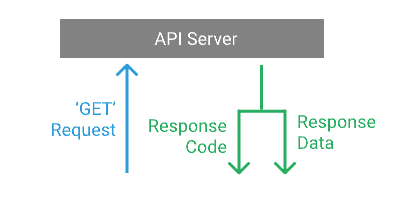

In [59]:
Image('figs/api.png')

API works in the same way. You make a request to an API server for data, and you get a response. 


### Making API Requests in Python <a class="anchor" id="section6_2"></a>

To work with APIs in Python we can use the most common **requests** library. 
<div class="alert alert-block alert-info">
<b>Note:</b> As it is not part of base Python you will need to install it through pip install with the following: 'pip install requests' .
</div>



### Our First API Request <a class="anchor" id="section6_3"></a>

There are many different types of requests. The most commonly used one, a GET request, is used to retrieve data. Because we’ll just be working with retrieving data, our focus will be on making ‘get’ requests. When we make a request, the response from the API comes with a response code which tells us whether our request was successful. Response codes are important because they immediately tell us if something went wrong.


But first, let us find an end point to connect to. We will use [Open Governence Data Platform India](https://data.gov.in/) for this endevour which could be a good example for your projects. Open Government Data Platform India or *data.gov.in* is a platform for supporting Open data initiative of Government of India. This portal is a single-point access to datasets, documents, services, tools and applications published by ministries, departments and organisations of the Government of India. You will now be introduced to how to use this website as an example for your future researches. Other end points are laid out in a similar matter with different documentation and structure which you must research and try to use yourself. 

Let us start our example. The website itself looks like this: 


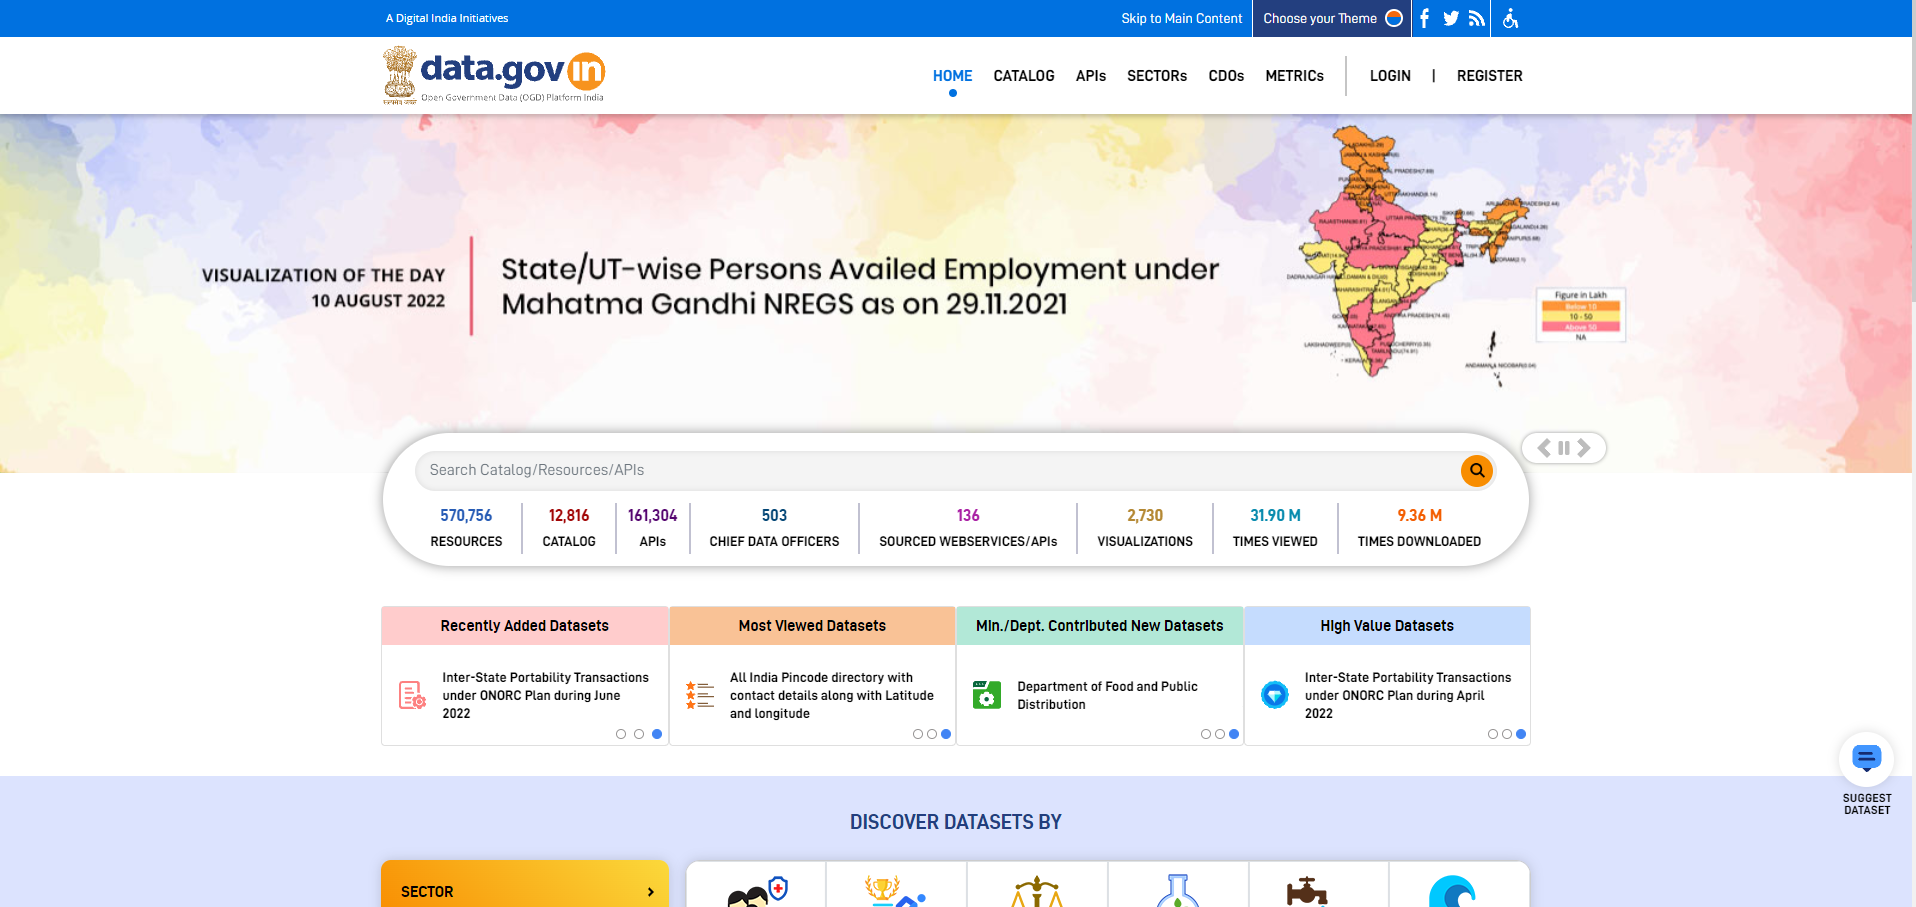

In [60]:
Image("figs/datagovin.png", width= 1400, height = 1000 )

To utilize this website let us first find a subject through the catalog. You can also select certain domains (databases) and sectors as seen below. 

In [ ]:
Image("figs/datagovin2.png")

I arbitrarily chose covid as a topic and it has listed me all the APIs regarding the matter.

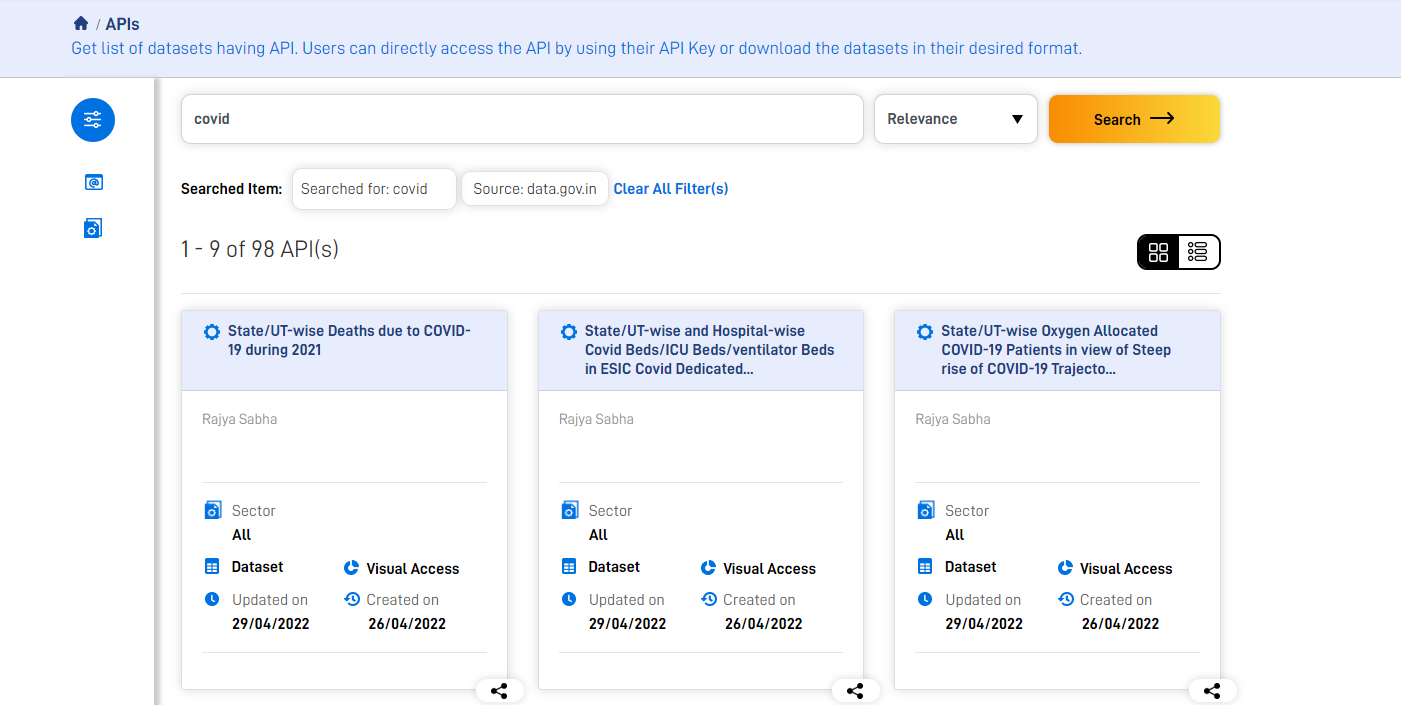

In [62]:
Image("figs/datagovin3.png")

After I select a API I am interested in, this page pops up where it asks for certain parameters. 
* API Key: This is specific to this website in particular, however do expect many other databases to establish their own rules. 
    * In this website, you need to create an account in order to receive a member specific key which you can use to get the entirety of the API output.
    * With a sample key you can only access 10 data points.
* Format : Here, many are tempted to get the output format as CSV however it is easier to just get a JSON file for now and only after then turn it into a csv which we will do later on. 
* Offset : If you would like to skip some records. 
* Limit : Maximum number of records. 
* Filters : Filters the results with respect to fields specified. 

There is no need to input all the parameters, the critical ones are the API key and format. 

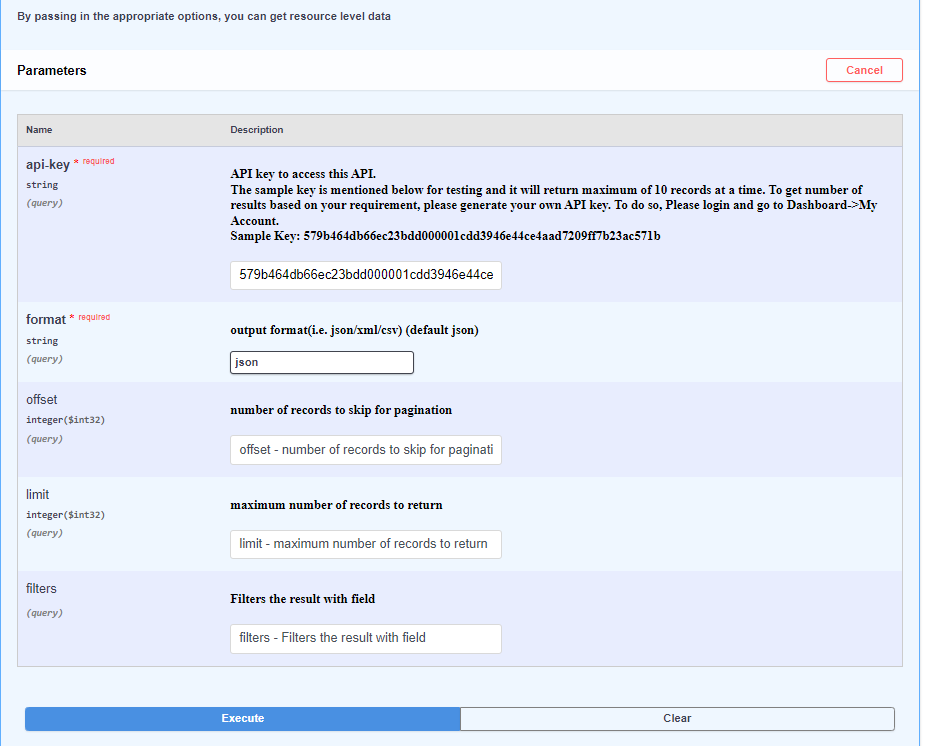

In [63]:
Image("figs/datagovin5.png")

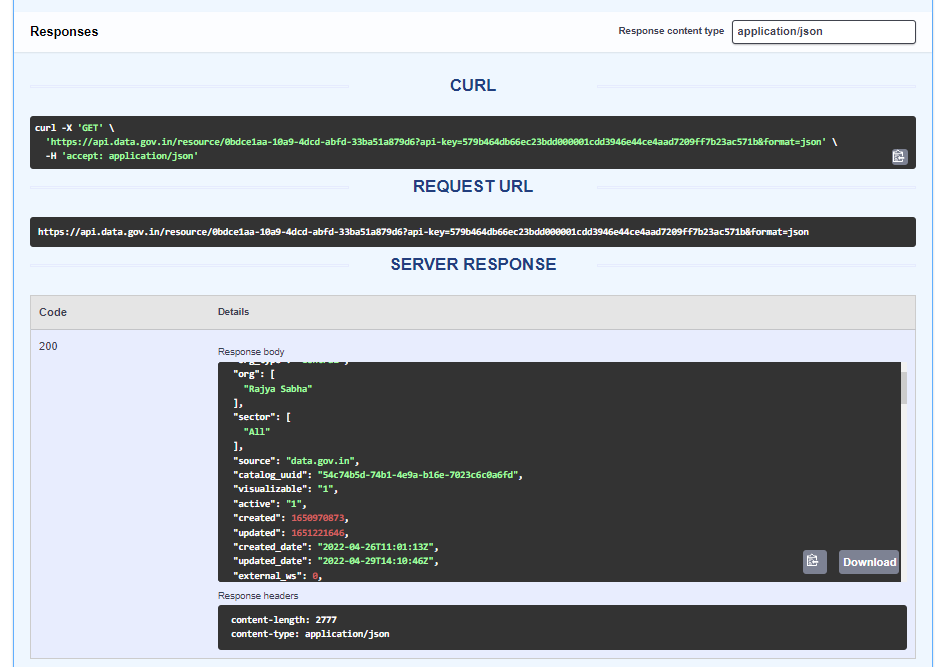

In [64]:
Image("figs/datagovin6.png")

To make a ‘GET’ request, we’ll use the requests.get() function, which requires one argument — the URL we want to make the request to. Please note that we copied the request url in the image above on the url part in the code below. When you have your own api it is important that you change the code after the part "<font color = red>?api-key= </font>"

In [65]:
import requests
import pandas as pd
import json # We can use JSON operations with this, we need it to change it a pandas dataframe later on.
from pandas.io.json import json_normalize #we use this so that we can stop an error such as arrays being not in the same length in fields in the json file. 


resp = requests.get("https://api.data.gov.in/resource/0bdce1aa-10a9-4dcd-abfd-33ba51a879d6?api-key=579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b&format=json")



The <font color = 'lightblue'> get()</font> function returns a <font color = "orange">response </font> object. We can use the response.status_code attribute to receive the status code for our request:

In [66]:
print(resp.status_code)

200


<div class="alert alert-block alert-success">
We received a 200! This means our request was succesful. .
</div> 

There are many API Status Codes. You can find a small snippet of them here if you are interested, and are willing to understand what went wrong in the future. Cited from [Dataquest - Python API Tutorial](https://www.dataquest.io/blog/python-api-tutorial/)

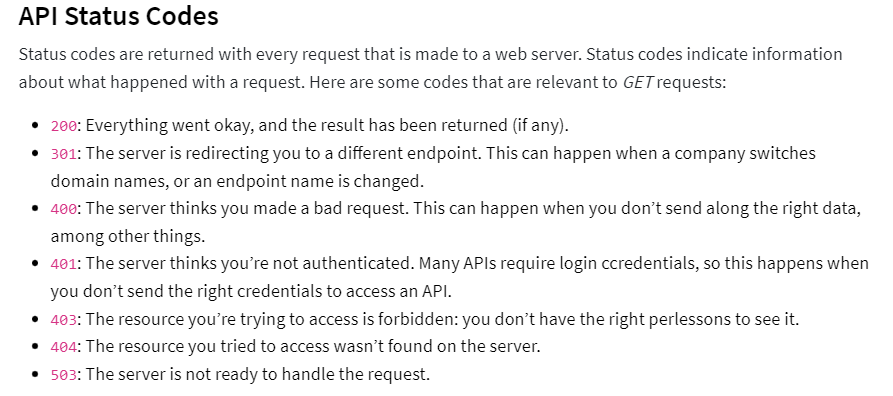

In [67]:
Image("figs/status.png")

Now that we have received a response and stored it in our "response" object, let us read what is inside the file as a JSON.

In [68]:
print(resp.json())

{'index_name': '0bdce1aa-10a9-4dcd-abfd-33ba51a879d6', 'title': 'State/UT-wise COVID-19 Vaccine Doses Supplied by Government of India till 01 July 2021', 'desc': 'State/UT-wise COVID-19 Vaccine Doses Supplied by Government of India till 01 July 2021', 'org_type': 'Central', 'org': ['Rajya Sabha'], 'sector': ['All'], 'source': 'data.gov.in', 'catalog_uuid': '54c74b5d-74b1-4e9a-b16e-7023c6c0a6fd', 'visualizable': '1', 'active': '1', 'created': 1650970873, 'updated': 1651221646, 'created_date': '2022-04-26T11:01:13Z', 'updated_date': '2022-04-29T14:10:46Z', 'external_ws': 0, 'external_ws_url': '', 'target_bucket': {'index': 'api', 'type': '54c74b5d-74b1-4e9a-b16e-7023c6c0a6fd', 'field': '0bdce1aa-10a9-4dcd-abfd-33ba51a879d6'}, 'field': [{'id': 'sl__no_', 'name': 'Sl. No.', 'type': 'keyword'}, {'id': 'state_ut', 'name': 'State/UT', 'type': 'keyword'}, {'id': 'vaccine_doses_supplied', 'name': 'Vaccine doses supplied', 'type': 'double'}], 'message': 'Resource lists', 'version': '2.2.0', 'sta

As you can see very hard to utilize!

Here you have 2 options you can choose. Either work with JSON which you can read further in the link provided in [Part 3: Let's Learn How To Utilize APIs](#3) or turn this data into a pandas dataframe. The continuation of this introduction will focus on the pandas dataframe route which was summarized from [this post in Stackoverflow](https://stackoverflow.com/questions/1871524/how-can-i-convert-json-to-csv).

In [69]:
content = json.loads(resp.content) #We find the content of the response variable and we load it utilizing json.loads into a variable.

In [70]:
content #The variable shows what it has inside as content. Now here please be careful as we are looking for things that resemble a data cluster.
#In this example we can see that the data itself starts after the 'records' and thus must be kept in mind.

{'index_name': '0bdce1aa-10a9-4dcd-abfd-33ba51a879d6',
 'title': 'State/UT-wise COVID-19 Vaccine Doses Supplied by Government of India till 01 July 2021',
 'desc': 'State/UT-wise COVID-19 Vaccine Doses Supplied by Government of India till 01 July 2021',
 'org_type': 'Central',
 'org': ['Rajya Sabha'],
 'sector': ['All'],
 'source': 'data.gov.in',
 'catalog_uuid': '54c74b5d-74b1-4e9a-b16e-7023c6c0a6fd',
 'visualizable': '1',
 'active': '1',
 'created': 1650970873,
 'updated': 1651221646,
 'created_date': '2022-04-26T11:01:13Z',
 'updated_date': '2022-04-29T14:10:46Z',
 'external_ws': 0,
 'external_ws_url': '',
 'target_bucket': {'index': 'api',
  'type': '54c74b5d-74b1-4e9a-b16e-7023c6c0a6fd',
  'field': '0bdce1aa-10a9-4dcd-abfd-33ba51a879d6'},
 'field': [{'id': 'sl__no_', 'name': 'Sl. No.', 'type': 'keyword'},
  {'id': 'state_ut', 'name': 'State/UT', 'type': 'keyword'},
  {'id': 'vaccine_doses_supplied',
   'name': 'Vaccine doses supplied',
   'type': 'double'}],
 'message': 'Resource 

In [71]:
"""
As we realized that the 'records' were where the data was starting to be written, we used that
to create a data frame from the dictionary that was inside the content of the response. 
"""

df = pd.DataFrame.from_dict(content['records'])

In [72]:
df.head()

sl__no_                   state_ut  vaccine_doses_supplied
0       1  Andaman & Nicobar Islands                  230000
1       2             Andhra Pradesh                13804020
2       3          Arunachal Pradesh                  610360
3       4                      Assam                 6566020
4       5                      Bihar                12789100

There we go! We have the data now as a pandas data frame. From this moment on we can do any operations that we deem necessary. Follow the course to learn how :) 

You can also save this data frame in a csv file just like this:

In [73]:
df.to_csv("sample.csv")

<div class="alert alert-block alert-warning">
<b>Remember! </b> Always try to research the web first when you encounter a block - be it a bug, or a general sense of not knowing what to do. This will make you into better scientists. Hey, even I studied a bit on the web to remember how to do this! You can do it too :)
</div> 

<a id = "cite"></a>
**Citations utilized:**

[ValueError: arrays must all be same length](https://stackoverflow.com/questions/50531308/valueerror-arrays-must-all-be-same-length)

[Dataquest - Python API Tutorial](https://www.dataquest.io/blog/python-api-tutorial/)


Best of Luck with your studies!